In [5]:
"""
Code for accommodating the graph-making need of ECON 3229-2 Money, Banking, and Financial Systems 

University of Missouri-Columbia

Fangda Wang

Fall 2017


https://github.com/vitanova
"""

# I work as teaching assistant for this course, and am told to generate/update lots of figures of macroeconomic
# and monetary time series, mainly from the FRED:
# https://fred.stlouisfed.org/
# although the website has the functionality to plot figures, it's elementary and cannot satisify this course's demand
# and, I am tired of handling excel, since each time I have to build the procedure from the begining
# moreover, there are a number of similar tasks in the foreseeable future, so I decide to write some code 
# to automize the procedure, before it is too late

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#this is a third-party api for manipulating fred data
from fred import Fred

#first, use the api key to get access to fred, all data in dictionary format
#replace with your own key
fr = Fred(api_key='4bba000775edea91bc01729d217cf3da', response_type='dict')

#now, use the series id to get observations
cpi=fr.series.observations(series_id="FF") ## <--- make change: series_id
aaa=fr.series.observations(series_id="DFEDTARU") ## <--- make change

#convert the dictionary data to data frame
CPI=pd.DataFrame.from_dict(cpi)
AAA=pd.DataFrame.from_dict(aaa)

#rename columns
CPI.columns = 'date', 'end', 'start', 'S1' ## <--- make change: series_name
AAA.columns = 'date', 'end', 'start', 'S2' ## <--- make change

#merge the two tables and use date as key
al=pd.merge(CPI, AAA, how='left', on='date')
al.tail(160)

C:\Anaconda3\lib\site-packages\fred\helpers\__init__.py:36: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  frame = frame.convert_objects(convert_numeric=True)
C:\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


,date,end_x,start_x,S1,end_y,start_y,S2
3145,2014-10-15,2017-11-07,2017-11-07,0.09,2017-11-07,2017-11-07,0.25
3146,2014-10-22,2017-11-07,2017-11-07,0.09,2017-11-07,2017-11-07,0.25
3147,2014-10-29,2017-11-07,2017-11-07,0.09,2017-11-07,2017-11-07,0.25
3148,2014-11-05,2017-11-07,2017-11-07,0.08,2017-11-07,2017-11-07,0.25
3149,2014-11-12,2017-11-07,2017-11-07,0.09,2017-11-07,2017-11-07,0.25
3150,2014-11-19,2017-11-07,2017-11-07,0.10,2017-11-07,2017-11-07,0.25
3151,2014-11-26,2017-11-07,2017-11-07,0.10,2017-11-07,2017-11-07,0.25
3152,2014-12-03,2017-11-07,2017-11-07,0.10,2017-11-07,2017-11-07,0.25
3153,2014-12-10,2017-11-07,2017-11-07,0.12,2017-11-07,2017-11-07,0.25
3154,2014-12-17,2017-11-07,2017-11-07,0.12,2017-11-07,2017-11-07,0.25


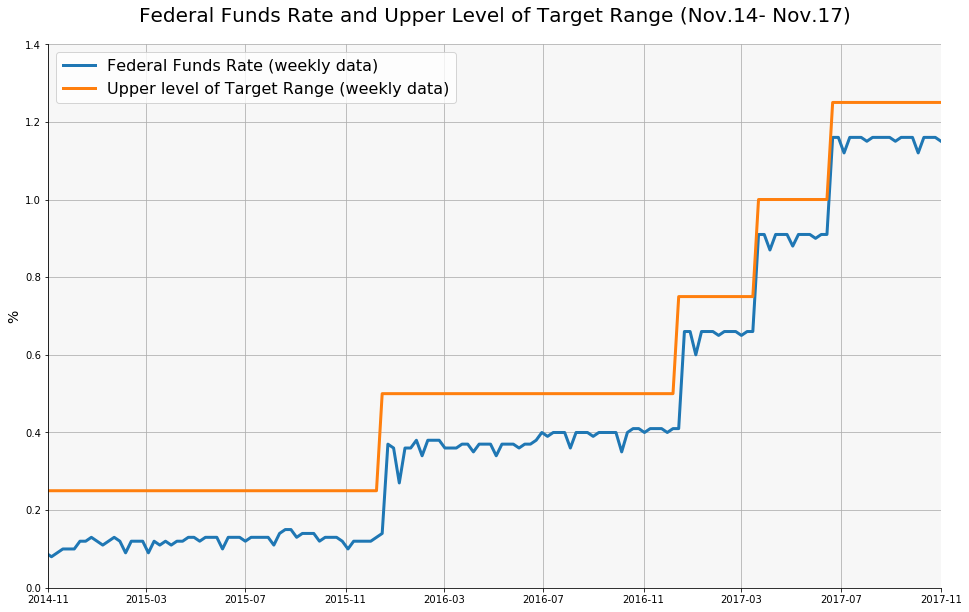

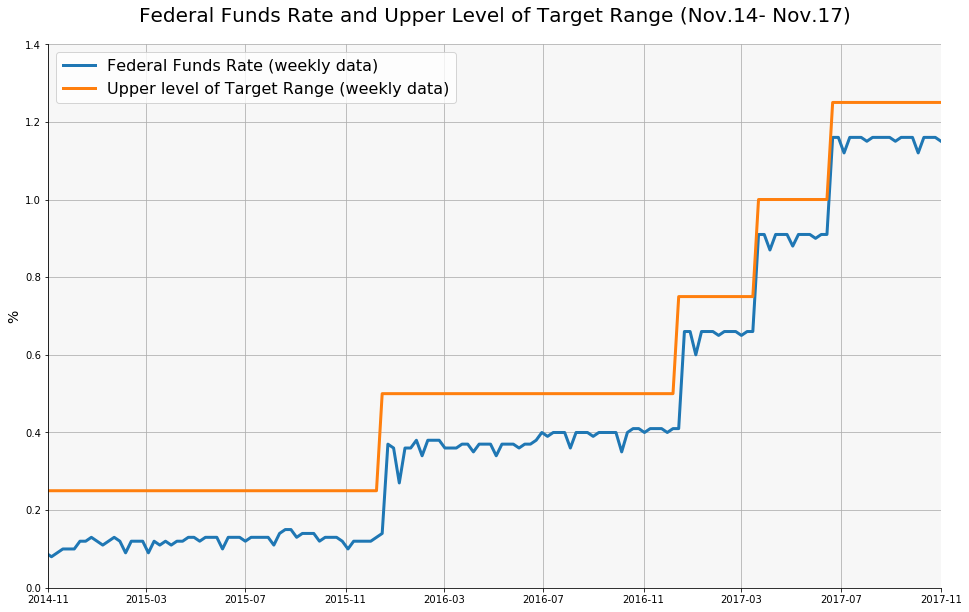

In [22]:
fig, ax=plt.subplots(figsize=(16, 10))
ax.plot(al['date'], al['S1'], label='Federal Funds Rate (weekly data)', linewidth=3)
ax.plot(al['date'], al['S2'], label='Upper level of Target Range (weekly data)', linewidth=3)
ax.legend(loc='best', fontsize=16)
ax.set_ylim(0, 1.4)

ax.set_xlim('2014-11-01', '2017-11-01')
ax.set_title("Federal Funds Rate and Upper Level of Target Range (Nov.14- Nov.17)", fontsize=20, position=[.5, 1.03])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("%", fontsize=14)
ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.06)
ax.grid()
plt.show()